In [1]:
# ▶학습 목표:
#    CNN 네트워크 이해: 합성곱(convolution), 필터(filter)/커널(kernel), 특성맵 (feature map),
#             패딩(padding), 스트라이드(stride), 풀링(pooling)
#    가중치 시각화, 특성 맵 시각화
#    MNIST 이미지분류 문제를 CNN 을 사용하여 해결
#    GPU(cuda) 활용
#    validation dataset 활용
#    모델 파라미터 확인
#    학습모델 저장, 복원
#    레이어의 출력 중간단계 보기

# 데이터 셋 : MNIST, FashionMNIST

# 🟦 CNN - MNIST

# 합성곱 (Convolution) 이란?

In [2]:
# '합성곱(Convolution)' 은 입력데이터에서 유용한 특성(feature)만
# 드러나게 하기 위한 것으로 비유할수 있다.

# 합성곱의 동작원리를 보자

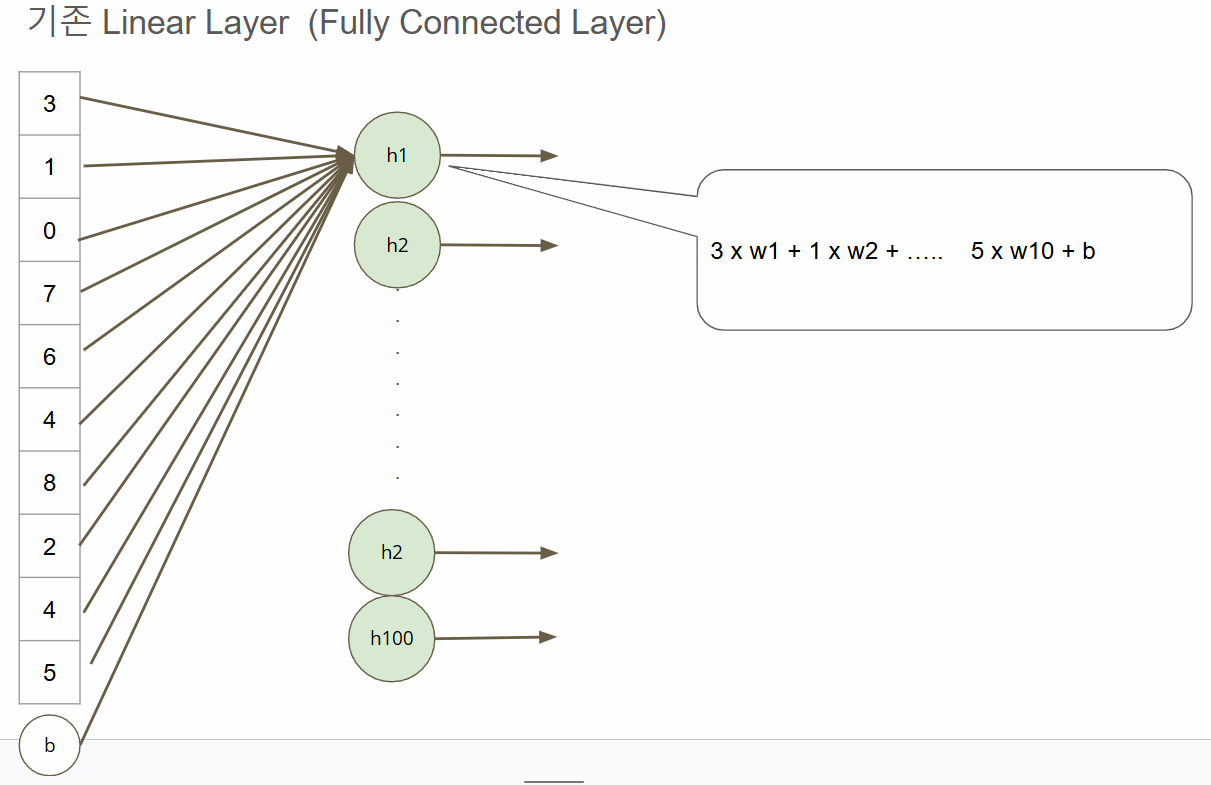

In [3]:
# ↑ 기존의 Linear layer 에선
# - 뉴런 마다 '모든 입력'에 가중치를 '곱' 하여 받는다.
# - 가중치(weight) 는 훈련 최초에는 랜덤하게 초기화.
# - 출력은 '뉴런의 개수'만큼의 출력.

In [4]:
# 합성곱은 입력데이터 '전체' 에 가중치를 적용하는 것이 아니라
#  '일부' 에 가중치를 적용(곱) 하는 겁니다


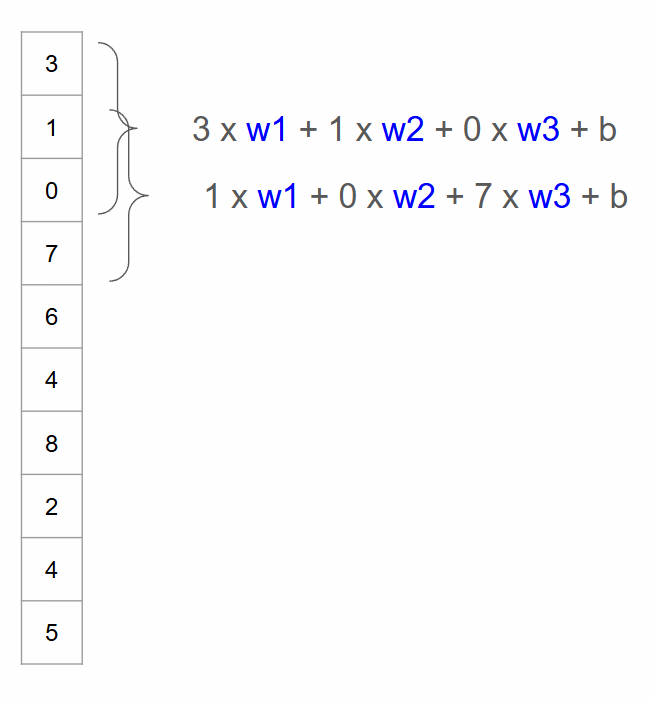

In [5]:
# 입력의 '일부'에 가중치 적용하여 '1개의 출력' 만든다
# 그리고! 한칸 이동하여 적용한뒤 새로운 출력 만든다


In [6]:
# 첫번째 합성곱에 사용된 가중치 w1~w3 와 절편 b 가 두번째 합성곱에도 동일하게 사용
# 이렇게 '한칸씩 이동' 하면서 출력을 만드는 것이 '합성곱'
#
#   10개의 입력 x  뉴런의 가중치가 3개  => 8개의 출력(8번의 계산)

In [7]:
# 동일한 뉴런을 사용하여 8번의 계산을 통해 8개의 출력을 만든다!

# [비교]
# Linear의 뉴런 : 10개의 weight 를 가지고 1개의 출력 만듬
# 합성곱층의 뉴런 : 3개의 weight 를 가지고 8개의 출력 만듬.

# 합성곱층 뉴런의 weight 개수는 정해줄수 있다 (하이퍼 파라미터다!)


## CNN 의 **필터(filter)** 혹은 **커널 (kernel)**

In [8]:
# 합성곱 신경망(CNN) 에선
#  뉴런이 '이동' 하면서 출력을 만들기 때문에
#  뉴런을 'filter(필터)' 혹은 'kernel(커널)' 이라 부른다
#
#  ♣ 뉴런 = 필터 = 커널 <= CNN 에선 모두 같은 말이라고 생각해도 무방함

In [9]:
# ※ '뉴런 개수' 를 이야기 할 때는 '필터' 라 부르고
#   '가중치' 를 의미할 때는 '커널' 이라고 부르곤 합니다
#   (그러나, 혼용되어 쓰임...)


## 2차원 입력 & 필터 & 출력

![](https://upload.wikimedia.org/wikipedia/commons/9/90/CNN-filter-animation-1.gif?20230201202141)

In [10]:
# 입력이 2차원 배열이면 '필터'도 2차원 이어야 한다
# 필터의 커널 크기는 정하기 나름 (하이퍼 파라미터!)

# 입력 x 커널 의 합성곱후 1개의 출력 만든다 (여기에 bias 도 더해진다)
# 좌 → 우,  상 → 하 로 필터 이동해가며 합성곱 수행.

In [11]:
# 출력의 모양은?
# 입력 (4, 4), 커널 (3,3) => 출력 (2, 2) (4개의 출력)

## 특성 맵 (feature map)

In [12]:
# 출력의 shape 는?
# 4개의 '출력'을 필터가 입력에 놓인 위치에 맞게 '2차원'으로 배치
#  출력: (2, 2)  ← 출력도 2차원이다.

# 입력 (5,5)  필터 (3,3) => 합성곱 출력 (3, 3)   <- 합성곱 출력도 2차원이다!
# 입력 (5,5)  필터 (4,4) => 합성곱 출력 (2, 2)   <- 마치 압축된 느낌!

# 출력을 2차원으로 표현하니 (4, 4) 크기의 입력이 (2, 2) 크기로 압축되었다!
# 합성곱 계산을 통해 얻은 출력을 '특성 맵 (feature map)' 이라 한다.

## 합성곱층의 출력

In [13]:
# Linear에서 여러개의 뉴런을 사용했듯이 합성곱 층에서도 '여러개의 필터' 를 사용 가능!
#  여러개의 필터를 사용하면 만들어진 '특성 맵'은 순서대로 차곡 차곡 쌓임
#  가령, (2, 2)크기의 특성맵을 쌓으면 -> 3차원 배열이 됨.
#  즉, '3개의 필터를 사용하면' (3, 2, 2) 크기의 3차원 배열이 됩


![](https://miro.medium.com/v2/resize:fit:1400/1*GPBRUVqDhQxDuW8r6X5n7g.png)
![](https://blog.kakaocdn.net/dn/Bbqhy/btruWkuBu46/j0uQ7kHhe5Y3YBzwLXj31K/img.png)

![](https://velog.velcdn.com/images/groovallstar/post/fd8d0bdc-5c0e-46cd-8c04-dba32a727a9e/image.gif)

In [14]:
# 입력 (4, 4)
#   필터 (3, 3) x 1개  => (2, 2)

#   필터 (3, 3) x 3개 => (3, 2, 2)

# 합성곱 층에 있는 필터의 가중치(커널)들은 각각 다르다 (당연!)

In [15]:
# '합성곱' 의 실제 계산은 밀집층과 동일하게 단순히 '입력' 과 '가중치' 를 곱하는 것이지만,
# 2차원 형태를 유지하는 점이 다르다

# 입력보다 훨씬 작은 크기의 커널을 사용하여 2차원 '특성맵(들)' 을 만들어 낸다.
# 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서
# 뛰어난 성능을 발휘

# import & 난수 seed

In [16]:
import os
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# torch.manual_seed(42) # 전역 시드를 고정
generator = torch.Generator().manual_seed(42)  # 독립적인 난수 시퀀스 생성
# 많은 pytorch 의 함수에 generator= 매개변수가 있다. 여기서 사용 가능.

In [17]:
# GPU 사용 가능 여부 확인.  가능하다면 GPU (cuda)! 아니면 CPU 사용
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

DEVICE

device(type='cuda')

# Conv2d
- 2D 함성곱 층

**torch.nn.Conv2d**

https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

```python
class torch.nn.Conv2d(
  in_channels,  # 입력 채널 (*필수)
  out_channels,  # 출력 채널 (필터의 개수) (*필수)
  kernel_size,  # 필터에 사용할 커널의 크기 (*필수)
  stride=1,      # 스트라이드, 필터 이동 크기
  padding=0,    # 패딩의 크기
  dilation=1,
  groups=1,
  bias=True,
  padding_mode='zeros',
  device=None,
  dtype=None)
```




## in_channels=, out_channels=, kernel_size=

In [18]:
nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3))

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))

In [19]:
# 적절한 커널의 크기 (kernel_size=)는?
# - 커널의 크기는 하이퍼 파라미터!
# - 보통(3, 3) 이나 (5,5) 크기가 권장
# - 여러 값을 시도해봐야 함.


- 합성곱 신경망
  - 일반적으로 1개 이상의 합성곱 층을 쓴 인공 신경망을 '합성곱 신경망' 이라 부름

## padding=

![](https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif)    
![](https://velog.velcdn.com/images%2Fiissaacc%2Fpost%2F443d5ae0-b4b6-4203-a0bb-ed2607fe7956%2FconvSobel.gif)

![](https://miro.medium.com/max/666/1*noYcUAa_P8nRilg3Lt_nuA.png)
![](https://miro.medium.com/max/1300/1*sKTqxILUPNI6P8t-bBIE1w.png)

In [20]:
# 입력(4,4) x 커널 (3,3) => 출력(2,2)

# 만약, 커널 (3,3) 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들려면?
# => 더 큰 입력에 합성곱 하는 척(?) 해야 함.

# ex) 가령 (4,4) 입력에 패딩을 주어 (6,6) 입력인것처럼 하면
#  입력(6,6) x 커널(3,3) => 출력 (4,4)

In [21]:
# 입력배열 주위를 가상의 원소로 채우는 것을 '패딩(padding)'
# 패딩의 역할은 순전히 커널이 이동하며 출력하는 횟수를 늘려주는 것밖에 없다.
# 실제 입력값이 아니기 때문에 패딩은 '0' 으로 채우기에 계산에 영향을 주지 않는다


- kernel_size=3, padding=1, strides=1 (aka Same Padding):
  - '입력'과 '특성맵의 크기'를 '동일'하게 만들기 위해 입력 주위를 0으로 패딩하는 것
  - 합성곱 신경망에서 많이 사용되는 방식
- padding=0
  - 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 것.
  - '입력' 에 비해 '특성맵의 크기' 는 줄어들수밖에 없다

### 패딩을 사용하는 이유

In [22]:
# 적절한 패딩을 통해 이미지의 주변에 있는 정보가 소홀히 다루어 지지 않도록 도와줍니다.
# 일반적인 합성곱 신경망에서는 same padding (입력, 출력의 크기 동일) 이 많이 사용.


In [23]:
nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1)

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

## strides=
이동의 크기

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Convolution_arithmetic_-_No_padding_strides.gif)    

![](https://www.researchgate.net/publication/350386951/figure/fig13/AS:1132448477913121@1647008165630/Schematic-of-2D-CNN-for-stride-1-and-stride-2-with-zero-padding-adding-additional-layers.jpg)

In [24]:
# 합성곱 연산이 한 칸씩 이동할때보다 두칸씩 이동하면
# 만들어지는 특성맵의 크기 (출력의 크기)는 더 작아진다!

# 이러한 이동의 크기를 stride 라 한다.
# stride=1  (기본값)

In [25]:
nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1, stride=1)

Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [26]:
# 일반적으로 stride= 값은
#   가로, 세로 방향을 다르게 지정하는 경우는 거의 없다
#   1보다 큰 값을 사용하는 경우도 드물다
#   대체로 기본값을 그대로 사용함.

- stride 와 padding 조합 예

![](https://miro.medium.com/max/640/1*YvlCSNzDEBGEWkZWNffPvw.gif)
![](https://miro.medium.com/max/640/1*gXAcHnbTxmPb8KjSryki-g.gif)
![](https://miro.medium.com/max/640/1*34_365CJB5seboQDUrbI5A.gif)
![](https://miro.medium.com/max/640/1*WpOcRWlofm0Z0EDUTKefzg.gif)

## 출력 shape

### ✅ 설정

```python
Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
입력: [batch, 1, 28, 28]
```

---

### 🔹 출력 크기 계산 공식

Conv2d의 출력 크기(높이/너비)는 다음 공식으로 계산됩니다:

$\text{Output size} = \frac{(W - K + 2P)}{S} + 1$

여기서

* ( W ) = 입력 크기 (28)
* ( K ) = 커널 크기 (3)
* ( P ) = 패딩 (1)
* ( S ) = 스트라이드 (기본값 1)

---

### 🔹 대입

Conv2d(in_channels=1,out_channels=32, kernel_size=3, padding=1) 로 하면 입력 shape 가 [batch, 1, 28, 28] 일때 출력 shape는


$\frac{(28 - 3 + 2*1)}{1} + 1 = 28$

---

### 🔹 출력 채널 수

out_channels = 32 → 출력의 channel 수는 32개입니다.

---

### ✅ 최종 출력 shape

```
[batch, 32, 28, 28]
```

---

즉,
**입력 [batch, 1, 28, 28] → 출력 [batch, 32, 28, 28]**
으로 변환.


# Pooling

In [27]:
# 풀링 (pooling) 은
#    합성곱 층에서 만든 특성 맵의 가로 세로 크기를 줄이는 역할
#    '중요한 것'만 추출!  (정보를 압축!)
#    그러나, '특성맵의 개수'는 줄이지 않습니다.★

#  ex) 특성맵 (3, 2, 2) → 풀링(2,2) -> 출력 (3, 1, 1)

# 풀링 층의 출력도 특성 맵 (feature map) 이라 불린다.
# 풀링 층에는 가중치가 없다.


![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)


- Max pool 과 stride 예
![](https://miro.medium.com/max/640/1*kW4HcS4zFxoKv6R4xtqFlg.gif)
![](https://miro.medium.com/max/640/1*LjXV6eQKTQcg-PJnBRE0VA.gif)

In [28]:
# ※ 여기서는 간단한 예를 위해 특성맵의 값을 정수로 표현했지만,
# 일반적으로 특성 맵에 들어있는 값은 '실수'입니다.

# 풀링은 가중치가 없다



## Max pooling

**torch.nn.MaxPool2d**

https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html


```python
class torch.nn.MaxPool2d(
  kernel_size,
  stride=None,
  padding=0,
  dilation=1,
  return_indices=False,
  ceil_mode=False)

```
- strides 값이 None 으로 주어지면 kernel_size 와 동일한 크기로 stride 한다

In [29]:
# 풀링 층의 출력도 '특성 맵(feature map)' 이라고 부를수 있나?
# => 합성곱신경망에서는 합성곱 층과 풀링 층에서 출력되는 값을 모두 특성 맵이라고 부릅니다.

In [30]:
nn.MaxPool2d(kernel_size=2)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

## Average Pooling

평균 풀링

**torch.nn.AvgPool2d**

https://docs.pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html

```python
class torch.nn.AvgPool2d(
  kernel_size,
  stride=None,
  padding=0,
  ceil_mode=False,
  count_include_pad=True,
  divisor_override=None)
```

In [31]:
# 최댓값 대신 평균을 계산하는 평균풀링.
# 나머지 동작및 매개변수는 MaxPool2d 와 동일

# 그러나, 많은 경우 평균 풀링보다 최대 풀링을 많이 사용합니다.
# 왜냐하면, 평균 풀링은 특성 맵에 있는 중요한 정보를 (평균하여) 희석 시킬 수 있기 때문입니다.


## 출력 shape
### ✅ 설정

```python
입력: [batch, 32, 28, 28]
MaxPool2d(kernel_size=2, stride=2)
```

---

### 🔹 출력 크기 공식

Pooling 계층의 출력 크기는 다음 공식으로 계산됩니다:

$\text{Output size} = \left\lfloor \frac{(W - K)}{S} \right\rfloor + 1$

여기서

* ( W = 28 ) (입력 크기)
* ( K = 2 ) (커널 크기)
* ( S = 2 ) (스트라이드)

---

### 🔹 계산

$\frac{(28 - 2)}{2} + 1 = \frac{26}{2} + 1 = 13 + 1 = 14
$

---

### ✅ 출력 shape

* 채널 수(32)는 변하지 않음
* 공간 크기: 28×28 → 14×14

따라서:

```
출력 shape = [batch, 32, 14, 14]
```

---

✅ **정답:**
**[batch, 32, 14, 14]**


# 합성곱 신경망의 전체 구조

## Feature Extraction & Classification

![](https://velog.velcdn.com/images/seongguk/post/35c2c439-1f96-4675-8963-3d0383d81ff8/%EC%BA%A1%EC%B2%98.JPG)

![](https://itwiki.kr/images/thumb/f/f3/CNN.jpeg/900px-CNN.jpeg)

# 컬러이미지를 사용한 합성곱
- ex) channel 이 3개

In [32]:
# Channel

# FashionMNIST 는 흑백 이미지라 2차원으로 표현 가능하지만
#  컬러이미지는 RGB채널이 있으니 3차원으로 표현된다.

# 가령 입력이 (4,4) 가 아니라 (3, 4, 4) 이 된다.  <- 3 은 채널차원 크기
# 이경우 합성곱은 어케 수행될까?

## 필터도 채널 차원 필요



In [33]:
# 색상차원이 있는 입력에서 합성곱을 수행하기 위해서는
# 필터도 가로, 세로 뿐 아니라 채널 차원도 필요
#  (편의상 채널 차원을 '깊이' 라고 부르겠습니다)

# 즉! 필터의 크기가 (3,3) 이 아니라 (3,3,3) 이 된다.  (channel, height, width)

![](https://blog.kakaocdn.net/dn/Bbqhy/btruWkuBu46/j0uQ7kHhe5Y3YBzwLXj31K/img.png)

In [34]:
# 입력 (3, 10, 10)
# 필터 (3, 3, 3) x 5개
# 합성곱 출력 (5, 8, 8)

# 입력 (5, 8, 8)
# 필터 (5, 3, 5) x 10개   (padding=0, stride=1)
# 합성곱 출력 (10, 6, 4)

##  합성곱 층에는 3차원 데이터로 전달해야 한다

In [35]:
# PyTorch 의 합성곱 층은 항상 이렇게 3차원 입력을 기대합니다.
# 만약 패션 MNIST 데이터처럼 graysacle 이미지일 경우에는 깊이 차원이 1인 3차원 배열로 변환하여 전달해야 합니다

#   (height, width) -> (channel, height, width) 형태로 변환!

#  ex) (28, 28) 크기의 2차원 배열을 (1, 28, 28) 크기의 3차원 배열로 변환

## 합성곱 층 다음에 합성곱 층이 다시 올때

In [36]:
# 앞선 층의 출력 shape 에 맞추어야 한다.
# 앞선 층의 out_channel 값이  다음 합성곱층의 in_channel 값이 되어야 한다.

In [37]:
# 입력 (3, 6, 6),
# 커널 (3, 3, 3) x 2개
# 출력 (2, 4, 4)

# 이 출력을 입력받는 합성곱 층의 in_channel 값은 2 이어야 한다!

# 데이터 셋 준비

In [38]:
# MNIST: 0~9 손글씨 숫자 이미지 (28×28, 흑백).

# transform=transforms.ToTensor() → PIL.Image를 [0.0,1.0] 범위의 PyTorch 텐서로 변환.

train_dataset = datasets.MNIST(root='MNIST_data/', train=True, download=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root='MNIST_data/', train=False, download=True,
                              transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.01MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.9MB/s]


In [39]:
print(len(train_dataset))
classes=train_dataset.classes  # torchvision 데이터셋의 타켓 클래스의 이름들은 여기에 있다.
print(classes)

print(len(train_dataset), len(test_dataset))

60000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
60000 10000


## 학습/검증 데이터 분리: random_split()

In [40]:
# 데이터셋 분할
# 학습 데이터셋을 85% 학습용, 15% 검증용으로 분할.
# 검증(validation)은 모델의 일반화 성능을 평가하는 데 사용.

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(train_dataset, [train_dataset_size, validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

51000 9000 10000


## DataLoader 준비

In [41]:
# DataLoader: 데이터셋을 batch 단위로 나누어 학습에 공급.
# batch_size= → 한 번의 학습 step에 batch_size개 이미지 사용.
# shuffle=True → 매 epoch마다 데이터 순서를 섞어서 모델이 순서에 의존하지 않도록 함.
# generator=   random seed

BATCH_SIZE = 64   # 미니배치 학습 단위. 이번에는 batch 크기를 좀더 크게 잡음

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, generator=generator)

validation_dataset_loader = DataLoader(dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True, generator=generator)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, generator=generator)

In [42]:
len(train_dataset_loader)  # 배치의 크기(개수)

797

# 모델 정의 & 생성

In [48]:
class MyCNNModel(nn.Module):

  def __init__(self):
    super().__init__()

    # 입력: 1채널(흑백) 28x28
    # conv1: (1->32채널, 3x3 커널) 출력 28x28
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

    # pooling: 크기 절반 (ex: 28->14)
    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

    # 입력: 32채널 14x14
    # conv2: (32->64채널, 3x3커널), 출력(14x14)
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)

    # pooling (14->7)


    # fc1: 입력(64x7x7 =3136) -> 출력 256
    self.fc1 = nn.Linear(64 * 7 * 7, 256)

    # fc2: 입력 256 -> 출력 10 클래스 (숫자 0~9)
    self.fc2 = nn.Linear(256, 10)

    # Dropout -> 과적합 방지
    self.dropout25 = nn.Dropout(p = 0.25)
    self.dropout50 = nn.Dropout(p = 0.5)


  def forward(self, data):

    # [Feature Extraction]
    # Conv -> ReLU -> Pool -> Dropout 순서 반복
    data = self.conv1(data)
    data = torch.relu(data)
    data = self.pooling(data)
    data = self.dropout25(data)

    data = self.conv2(data)
    data = torch.relu(data)
    data = self.pooling(data)
    data = self.dropout25(data)

    # [Classification]
    # 마지막에 fully connected layer 2개를 거쳐 10클래스에 대한 logit 출력
    data = data.view(-1, 7 * 7 * 64)

    data = self.fc1(data)
    data = torch.relu(data)
    data = self.dropout50(data)

    logits = self.fc2(data)

    return logits




In [49]:
# 모델 생성 DEVICE 로 모델 이동
model = MyCNNModel().to(DEVICE)

# 모델 파라미터 확인

In [50]:
for name, child in model.named_children():
  print('🔶', name)
  total = 0
  for param_name, param in child.named_parameters():
    print('  🟡', f"{param_name:9s}", ':', f"{param.numel():,}개", '←', param.data.shape)
    total += param.numel()
  total and print('  [total params]:', f"{total:,}개") # parameter 있는 레이어만 출력
  print()

🔶 conv1
  🟡 weight    : 288개 ← torch.Size([32, 1, 3, 3])
  🟡 bias      : 32개 ← torch.Size([32])
  [total params]: 320개

🔶 pooling

🔶 conv2
  🟡 weight    : 18,432개 ← torch.Size([64, 32, 3, 3])
  🟡 bias      : 64개 ← torch.Size([64])
  [total params]: 18,496개

🔶 fc1
  🟡 weight    : 802,816개 ← torch.Size([256, 3136])
  🟡 bias      : 256개 ← torch.Size([256])
  [total params]: 803,072개

🔶 fc2
  🟡 weight    : 2,560개 ← torch.Size([10, 256])
  🟡 bias      : 10개 ← torch.Size([10])
  [total params]: 2,570개

🔶 dropout25

🔶 dropout50



In [ ]:
"""
입력과 출력의 shape,  parameter 개수 계산

🔶 conv1
  🟡 weight    : 288개 ← torch.Size([32, 1, 3, 3])
  🟡 bias      : 32개 ← torch.Size([32])
  [total params]: 320개

  conv1 의 stride=1
  Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
  입력 [batch, 1, 28, 28] -> 출력 [batch, 32, 28, 28]

  Paramer 개수
    32 x 1 x 3 x 3 = 288개
  bias 는 out_channel 당 한개씩
    32개

🔶 pooling <- MaxPool2d(kernel_size=2, stride=2)
  입력 [batch, 32, 28, 28] -> 출력 [batch, 32, 14, 14]


🔶 conv2 <- nn.Conv2d(32, 64, 3, padding=1)
  🟡 weight    : 18,432개 ← torch.Size([64, 32, 3, 3])
  🟡 bias      : 64개 ← torch.Size([64])
  [total params]: 18,496개

  입력 [batch, 32, 14, 14] -> 출력 [batch, 64, 14, 14]

  parameter 개수
  weight 는
    64 x 32 x 3 x 3 => 18,432개
  bias 는 out_channel 당 한개씩
    64개

🔶 pooling
  입력 [batch, 64, 14, 14] -> 출력 [batch, 64, 7, 7]


🟨 data.view(-1, 7 * 7 * 64) 펼치기
  입력 [batch, 64, 7, 7] -> 출력 [batch, 3136]


🔶 fc1 <- nn.Linear(64 * 7 * 7, 256)
  🟡 weight    : 802,816개 ← torch.Size([256, 3136])
  🟡 bias      : 256개 ← torch.Size([256])
  [total params]: 803,072개

  입력 [batch, 3136] -> 출력 [batch, 256]
  parameter 개수
    3136 x 256 => 802,816개
  bias 는 out_channel 당 한개씩
    256개

🔶 fc2 <- nn.Linear(256, 10)
  🟡 weight    : 2,560개 ← torch.Size([10, 256])
  🟡 bias      : 10개 ← torch.Size([10])
  [total params]: 2,570개

  입력 [batch, 256] -> 출력 [batch, 10]
  parameter 개수
    256 x 10 => 2,560개
  bias 는 out_channel 당 한개씩
    10개

"""
None

# 손실함수 & optimizer

In [51]:
# 손실 함수: CrossEntropyLoss
#     softmax + negative log likelihood 결합.  <- softmax 함수가 포함되어 있다
#     다중 분류 문제에서 자주 사용.

loss_function = nn.CrossEntropyLoss()

# Optimizer: Adam , 학습률 0.001 !
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

# train, eval, test 함수 정의

In [52]:
def model_train(dataloader, model, loss_function, optimizer):

  model.train()   # 학습모드. 모델 파라미터 업데이트. Dropout 활성화

  train_loss_sum = 0
  train_correct = 0  # 모델이 맞춘 샘플수 (누적)
  train_total = 0   # epoch 전체에서 처리한 샘플수 (누적)

  total_train_batch = len(dataloader)

  for images, labels in dataloader:

    x_train = images.to(DEVICE)
    y_train = labels.to(DEVICE)

    outputs = model(x_train)

    loss = loss_function(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_sum += loss.item()

    train_total += y_train.size(0)
    train_correct += (torch.argmax(outputs, 1)==y_train).sum().item()

  train_avg_loss = train_loss_sum / total_train_batch
  train_avg_accuracy = 100 * train_correct / train_total

  return (train_avg_loss, train_avg_accuracy)


In [53]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval() # 평가 모드(추론 모드, 검증모드) (Dropout 비활성화)

    with torch.no_grad():

        val_loss_sum = 0
        val_correct=0
        val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)  # label 열 사이즈 같음
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item() # 예측한 값과 일치한 값의 합

        val_avg_loss = val_loss_sum / total_val_batch # 검증 데이터 평균 오차 계산
        val_avg_accuracy = 100*val_correct / val_total # 검증 데이터 평균 정확도 계산

    return (val_avg_loss, val_avg_accuracy)

In [54]:
def model_test(dataloader, model):

    model.eval() # 평가 모드 (Dropout 비활성화)

    with torch.no_grad(): #test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.

        test_loss_sum = 0
        test_correct=0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader: # images에는 이미지, labels에는 0-9 숫자

            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)  # label 열 사이즈 같음
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item() # 예측한 값과 일치한 값의 합

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)

# 학습 함수 정의

In [55]:
def train(model, epochs,
          train_dataset_loader, validation_dataset_loader,
          loss_function, optimizer):
  train_loss_list = []
  train_accuracy_list = []

  val_loss_list = []
  val_accuracy_list = []

  start_time = datetime.now()

  EPOCHS = epochs

  for epoch in range(EPOCHS):

      #==============  model train  ================
      train_avg_loss, train_avg_accuracy = model_train(train_dataset_loader, model, loss_function, optimizer)

      train_loss_list.append(train_avg_loss)
      train_accuracy_list.append(train_avg_accuracy)
      #=============================================

      #============  model evaluation  ==============
      val_avg_loss, val_avg_accuracy = model_evaluate(validation_dataset_loader, model, loss_function, optimizer)

      val_loss_list.append(val_avg_loss)
      val_accuracy_list.append(val_avg_accuracy)
      #============  model evaluation  ==============

      print('epoch:', '%02d' % (epoch + 1),
            'train loss =', '{:.4f}'.format(train_avg_loss), 'train acc =', '{:.4f}'.format(train_avg_accuracy),
            'val loss =', '{:.4f}'.format(val_avg_loss), 'val acc =', '{:.4f}'.format(val_avg_accuracy))

  end_time = datetime.now()

  print('elapsed time => ', end_time-start_time)

  return train_loss_list,train_accuracy_list, val_loss_list, val_accuracy_list

# 훈련

In [57]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = \
  train(model, 20, train_dataset_loader, validation_dataset_loader,
        loss_function, optimizer);

epoch: 01 train loss = 0.2721 train acc = 91.3471 val loss = 0.0640 val acc = 98.1556
epoch: 02 train loss = 0.0988 train acc = 96.9412 val loss = 0.0429 val acc = 98.7778
epoch: 03 train loss = 0.0775 train acc = 97.6157 val loss = 0.0410 val acc = 98.8222
epoch: 04 train loss = 0.0630 train acc = 98.0373 val loss = 0.0347 val acc = 99.1000
epoch: 05 train loss = 0.0573 train acc = 98.1941 val loss = 0.0322 val acc = 99.1778
epoch: 06 train loss = 0.0500 train acc = 98.4451 val loss = 0.0325 val acc = 99.1444
epoch: 07 train loss = 0.0453 train acc = 98.6020 val loss = 0.0321 val acc = 99.1556
epoch: 08 train loss = 0.0392 train acc = 98.7431 val loss = 0.0353 val acc = 99.1556
epoch: 09 train loss = 0.0395 train acc = 98.8000 val loss = 0.0341 val acc = 99.0778
epoch: 10 train loss = 0.0347 train acc = 98.8549 val loss = 0.0317 val acc = 99.2556
epoch: 11 train loss = 0.0314 train acc = 98.9824 val loss = 0.0326 val acc = 99.1444
epoch: 12 train loss = 0.0285 train acc = 99.0765 val 

In [ ]:
"""
epoch: 01 train loss = 0.2721 train acc = 91.3471 val loss = 0.0640 val acc = 98.1556
epoch: 02 train loss = 0.0988 train acc = 96.9412 val loss = 0.0429 val acc = 98.7778
...
epoch: 19 train loss = 0.0206 train acc = 99.3157 val loss = 0.0323 val acc = 99.1889
epoch: 20 train loss = 0.0229 train acc = 99.2373 val loss = 0.0304 val acc = 99.3000
elapsed time =>  0:03:01.879129
"""
None

# 모델의 저장및 로드

In [58]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [59]:
save_path = os.path.join(base_path, 'out', 'CNN_MNIST.pth')

In [60]:
# 저장하기
torch.save(model.state_dict(), save_path)

In [61]:
# 불러오기
model = MyCNNModel().to(DEVICE)
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

# 성능 테스트

In [62]:
model_test(test_dataset_loader, model)

accuracy: 99.37
loss: 0.0217953841699808


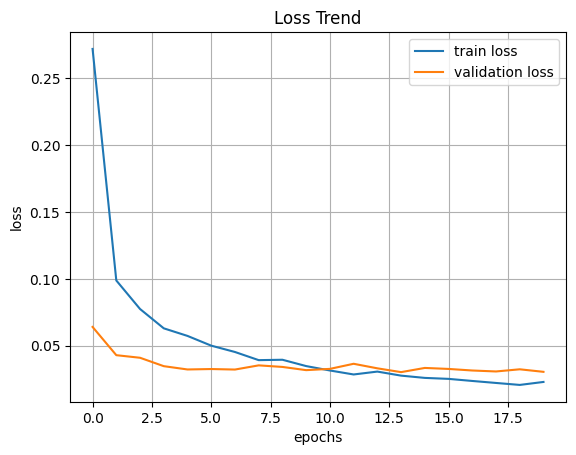

In [63]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='train loss')
plt.plot(val_loss_list, label='validation loss')

plt.legend()

plt.show()

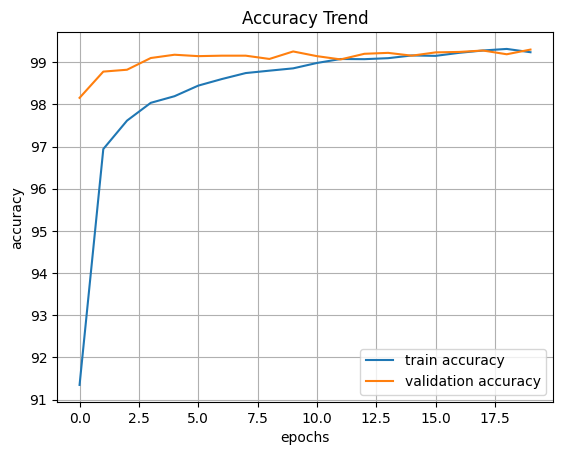

In [64]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='train accuracy')
plt.plot(val_accuracy_list, label='validation accuracy')

plt.legend()

plt.show()

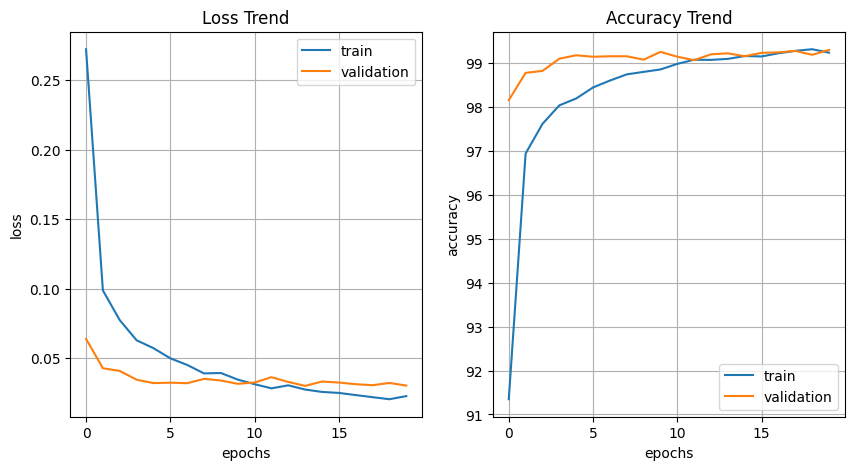

In [65]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()

# 🟦 CNN - FashionMNIST

# 데이터 준비

In [66]:
train_dataset = datasets.FashionMNIST(root='FashionMNIST_data/', train=True, download=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root='FashionMNIST_data/', train=False, download=True,
                              transform=transforms.ToTensor())

print(len(train_dataset), len(test_dataset))

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.51MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 161kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.5MB/s]

60000 10000


In [67]:
classes = train_dataset.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# 학습 / 검증 데이터 분리
print(len(train_dataset))

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(train_dataset, [train_dataset_size, validation_dataset_size], generator=generator)

print(len(train_dataset), len(validation_dataset), len(test_dataset))

In [69]:
BATCH_SIZE = 64

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,
                                  shuffle=True, generator=generator)

validation_dataset_loader = DataLoader(dataset=validation_dataset, batch_size=BATCH_SIZE,
                                       shuffle=True, generator=generator)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,
                                 shuffle=True, generator=generator)

# 모델, optimizer 준비

In [70]:
model = MyCNNModel().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

# 훈련

In [71]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = \
  train(model, 20, train_dataset_loader, validation_dataset_loader,
        loss_function, optimizer);

epoch: 01 train loss = 0.5704 train acc = 79.0686 val loss = 0.3721 val acc = 86.3889
epoch: 02 train loss = 0.3760 train acc = 86.3255 val loss = 0.3171 val acc = 88.2111
epoch: 03 train loss = 0.3285 train acc = 88.0235 val loss = 0.2677 val acc = 90.2889
epoch: 04 train loss = 0.2955 train acc = 89.1510 val loss = 0.2524 val acc = 91.1111
epoch: 05 train loss = 0.2751 train acc = 90.0471 val loss = 0.2450 val acc = 90.9556
epoch: 06 train loss = 0.2610 train acc = 90.3706 val loss = 0.2319 val acc = 91.6556
epoch: 07 train loss = 0.2501 train acc = 90.7647 val loss = 0.2235 val acc = 91.8556
epoch: 08 train loss = 0.2389 train acc = 91.2000 val loss = 0.2203 val acc = 91.8222
epoch: 09 train loss = 0.2283 train acc = 91.5373 val loss = 0.2126 val acc = 92.1889
epoch: 10 train loss = 0.2223 train acc = 91.6569 val loss = 0.2094 val acc = 92.3333
epoch: 11 train loss = 0.2131 train acc = 92.1216 val loss = 0.2112 val acc = 92.3111
epoch: 12 train loss = 0.2083 train acc = 92.1529 val 

In [ ]:
"""
epoch: 01 train loss = 0.5704 train acc = 79.0686 val loss = 0.3721 val acc = 86.3889
epoch: 02 train loss = 0.3760 train acc = 86.3255 val loss = 0.3171 val acc = 88.2111
...
epoch: 19 train loss = 0.1784 train acc = 93.3255 val loss = 0.2044 val acc = 92.8444
epoch: 20 train loss = 0.1718 train acc = 93.4451 val loss = 0.2036 val acc = 93.0222
elapsed time =>  0:03:05.628993
"""
None

# 모델 저장

In [72]:
model_path = os.path.join(base_path, 'out', 'CNN_FashionMNIST.pth')
torch.save(model.state_dict(), model_path)

# 성능 테스트

In [73]:
model_test(test_dataset_loader, model)

accuracy: 92.82
loss: 0.21423118760821167


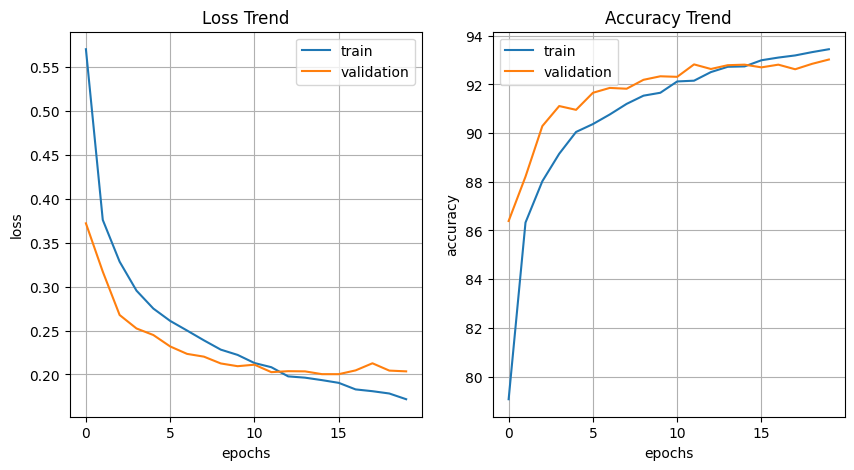

In [74]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()

# 예측, 실제 데이터 적용해보기

- 학습한 크기과는 다른 크기, 다른 색상채널(RGB), 다른 파일 포맷의 이미지 입력을 실제로 모델에 적용할시 예측값을 출력해봅니다

- 이를 함수로 만들어 동작시켜 봅니다. ( **predict()** )

- 테스트해볼 이미지를 4종류 이상 준비하여 실행한 결과를 출력해보세요 (예측값 + 시각화)


- **HINT**
    - 이미지의 사이즈 변환
    - 이미지 흑백 채널로 변환
    - 이미지 반전
    - 이미지 scaling
    - 이미지 차원변환 -> 모델에 입력하는 형태로
    
    - 위 이미지 조작을 손쉽게 다루기 위해 **pillow** 모듈 추천.
    - 필요시 설치하고 진행

In [75]:
from PIL import Image
import PIL.ImageOps as ops

In [76]:
base_path = r"/content/drive/MyDrive/DATA_SET/mnist_fashion"

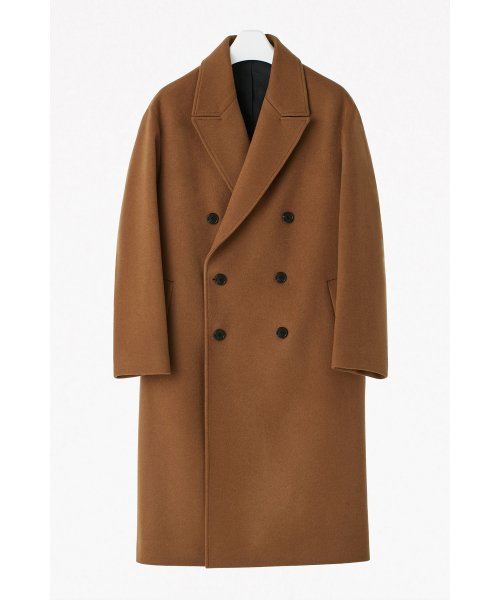

In [82]:
img = Image.open(os.path.join(base_path, 'img_coat.jpg'))
img

In [83]:
img.size

(500, 600)

In [84]:
len(img.getdata())  # hxw

300000

In [85]:
list(img.getdata())[0]

(255, 255, 255)

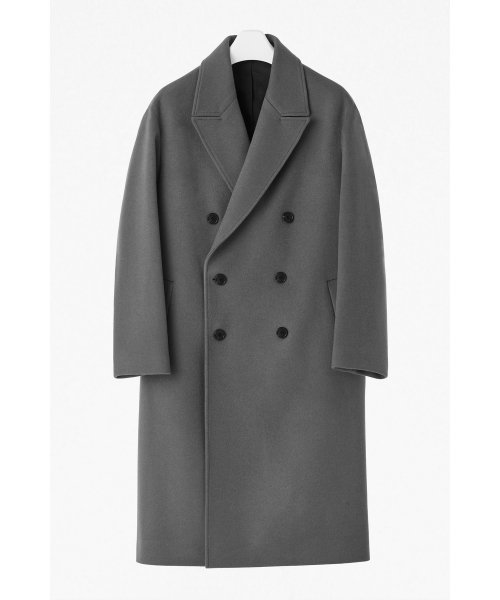

In [86]:
mono8img = img.convert('L')
mono8img

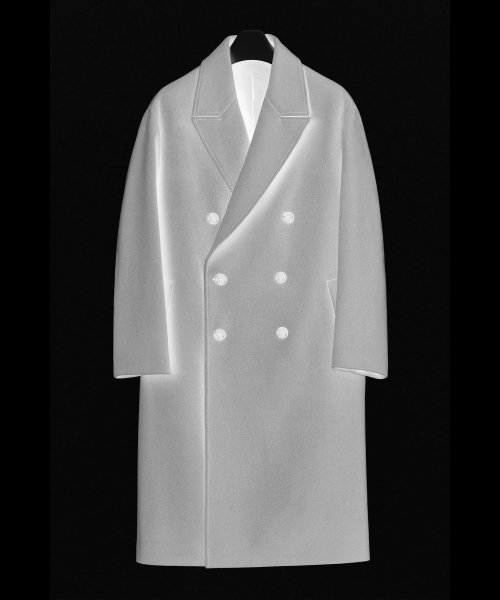

In [87]:
# 이미지 반전
invImg = ops.invert(mono8img)
invImg

In [88]:
# 전처리 transform (모델 입력형식과 동일)
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),  # 0~255 -> 0~1,   채널변환 (h, w, c) -> (c, h, w),  PyTorch Tensor 로 변환
])

In [89]:
transformed_img = transform(invImg)

transformed_img.shape

torch.Size([1, 28, 28])

In [90]:
# 배치차원 추가
img_tensor = transformed_img.unsqueeze(0)
img_tensor.shape

torch.Size([1, 1, 28, 28])

In [91]:
model.to(DEVICE) # 모델도
img_tensor = img_tensor.to(DEVICE)  # 입력텐서도

In [92]:
# 예측수행
with torch.no_grad():
  logits = model(img_tensor)
  probs = torch.softmax(logits, dim=1)
  predicted_class = torch.argmax(probs, dim=1).item()

print(f'예측 클래스: {predicted_class} - {classes[predicted_class]}')

예측 클래스: 2 - Pullover


In [93]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [94]:
# 함수로 만들기
from PIL import Image
import PIL.ImageOps as ops


def predict(file_path):
    img = Image.open(file_path)
    mono8img = img.convert('L')
    invImg = ops.invert(mono8img)

    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # resize
        transforms.ToTensor(),  # 스케일링, 차원변환
    ])

    transformed_img = transform(invImg)
    img_tensor = transformed_img.unsqueeze(0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # 모델도,
    img_tensor = img_tensor.to(device)  # 입력 텐서도.

    # 예측 수행
    with torch.no_grad():
        logits = model(img_tensor)
        probs = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(probs, dim=1).item()

    print(f"예측된 숫자: {predicted_class} - {classes[predicted_class]}")

예측된 숫자: 0 - T-shirt/top


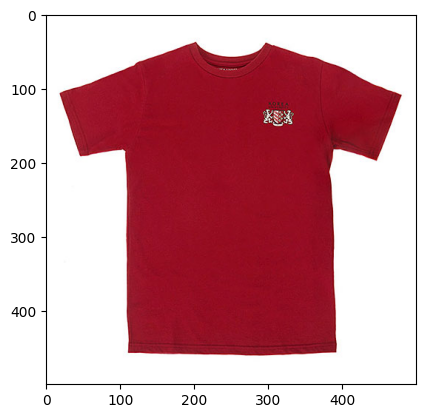

예측된 숫자: 9 - Ankle boot


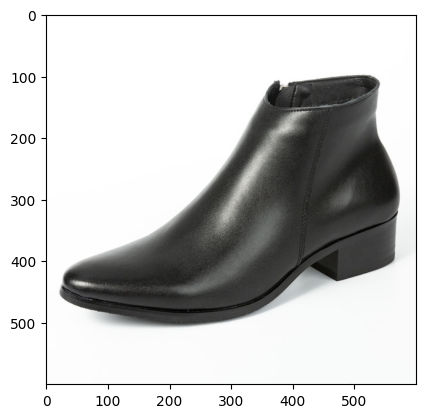

예측된 숫자: 2 - Pullover


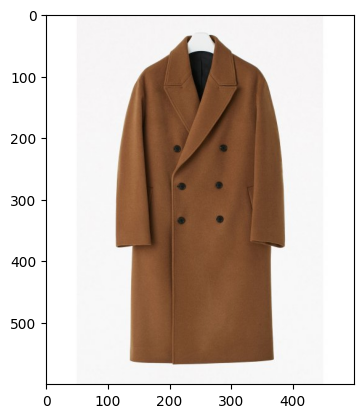

예측된 숫자: 8 - Bag


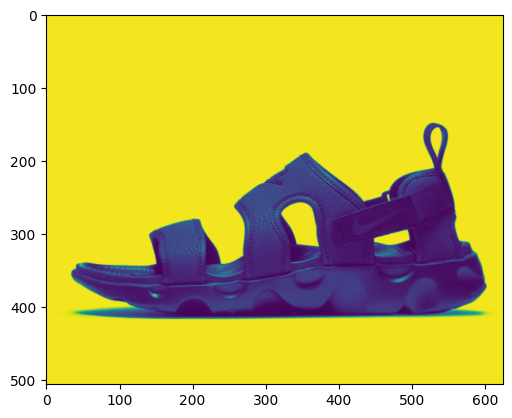

예측된 숫자: 1 - Trouser


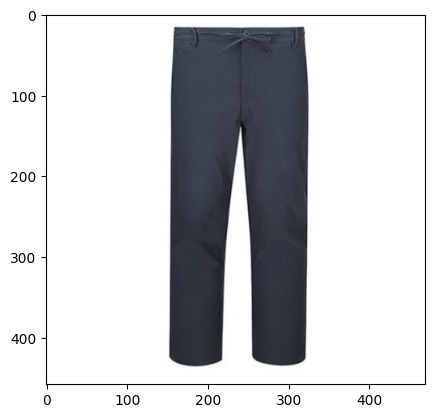

In [96]:
from glob import glob

for file_path in glob(os.path.join(base_path, 'img*.*')):
  predict(file_path)
  plt.imshow(Image.open(file_path))
  plt.show()

